In [ ]:
# Kaggle Titanic Competition got 0.77751 score will try to improve it with tensorflow
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [192]:
test_data = pd.read_csv('test.csv')

train_data = pd.read_csv('train.csv')

In [163]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
0,1,0,3,1,1,0,7.2500
1,2,1,1,0,1,0,71.2833
2,3,1,3,0,0,0,7.9250
3,4,1,1,0,1,0,53.1000
4,5,0,3,1,0,0,8.0500


In [164]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [173]:
train_data = train_data.drop(['Name', 'Embarked', 'Ticket'], axis=1)
# Extract the deck letter (first character) from the Cabin feature
train_data['Deck'] = train_data['Cabin'].str[0]

# Drop the original Cabin column
train_data = train_data.drop(['Cabin'], axis=1)

# One-hot encode the Deck feature
train_data = pd.get_dummies(train_data, columns=['Deck'], drop_first=True)


In [174]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

/var/folders/zs/58bkf3xx3wx2625zw8xrl_f40000gn/T/ipykernel_3508/892819329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)


In [176]:
# Encode the sex column
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])

# Define features and target variable
X = train_data.drop(['Survived', 'PassengerId'], axis=1)
y = train_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [177]:
# Create the models
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Fit the models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [180]:
# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

# Calculate the accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

# Print the accuracies
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"Decision Tree Accuracy: {accuracy_decision_tree}")
print(f"Random Forest Accuracy: {accuracy_random_forest}")

Logistic Regression Accuracy: 0.8208955223880597
Decision Tree Accuracy: 0.753731343283582
Random Forest Accuracy: 0.7723880597014925


In [186]:
# Create a Stacking Classifier
stacking_clf = StackingClassifier(estimators=[
    ('log_reg', log_reg),
    ('decision_tree', decision_tree),
    ('random_forest', random_forest)
], final_estimator=SVC())

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_stacking = stacking_clf.predict(X_test)

# Calculate accuracy
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

print(f"Stacking Classifier Accuracy: {accuracy_stacking * 100:.2f}%")

Stacking Classifier Accuracy: 82.84%


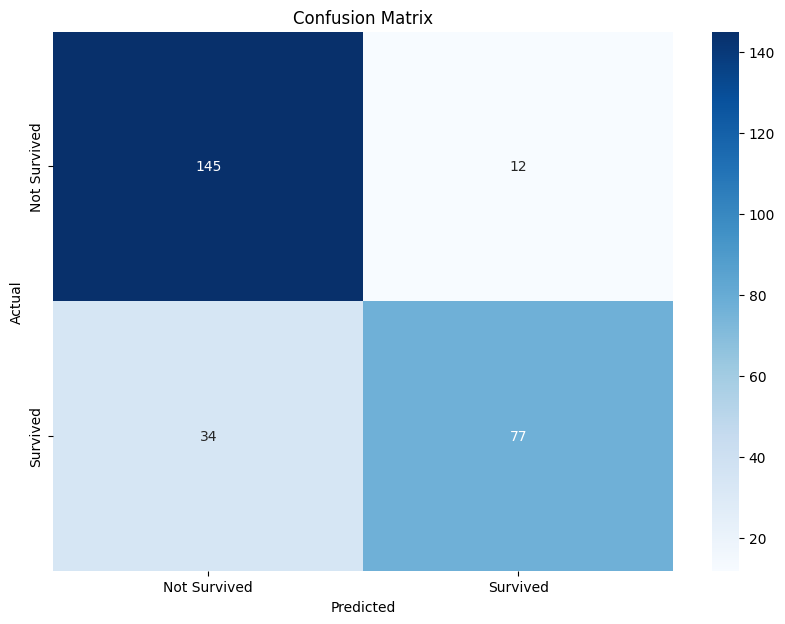

In [188]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [203]:
# Lets make predictions on the test data

# Drop unnecessary columns
test_data = test_data.drop(['Name', 'Embarked', 'Ticket'], axis=1)

test_data['Deck'] = test_data['Cabin'].str[0]

# Drop the original Cabin column
test_data = test_data.drop(['Cabin'], axis=1)

# One-hot encode the Deck feature
test_data = pd.get_dummies(test_data, columns=['Deck'], drop_first=True)


# Handle missing values
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Encode categorical variables
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])

# Define features
X_test_final = test_data.drop(['PassengerId'], axis=1)

KeyError: "['Name', 'Embarked', 'Ticket'] not found in axis"

In [195]:
# Make the prediction
y_pred_stacking_final = stacking_clf.predict(X_test_final)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Deck_T


In [133]:
# Create a DataFrame for the predictions
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_pred_stacking_final
})

# Save the predictions to a CSV file
submission.to_csv('prediction_submission.csv', index=False)
